In [1]:
from twython import TwythonStreamer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
sid = SentimentIntensityAnalyzer()

In [4]:
class MyStreamer(TwythonStreamer):
    
    counter = 0
    limit = 0
    data = []
    
    def on_success(self, data):
        if 'text' in data:
            if not self.limit == 0 and self.counter >= self.limit:
                self.disconnect()
                self.counter = 0
                return
            
            if 'retweeted_status' in data: # if found tweet is a retweet, return original tweet
                tweet = data['retweeted_status']
            else:
                tweet = data
                
#             print self.counter,': ', clean_text
#             print sid.polarity_scores(clean_text)
#             print

            self.data.append(sid.polarity_scores(tweet['text'])['compound'])
                
            self.counter += 1

    def on_error(self, status_code, data):
        print status_code

        # Want to stop trying to get data because of the error?
        # Uncomment the next line!
#         self.disconnect()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
from twitter_credentials import *

In [9]:
stream = MyStreamer(twitter, 'fEcXEwem8x24PkqqIYkVw5Jlh9jS6b2sLra7qAZg0kjbYMHoy6',
                    '231604654-w8KViHj9SUTTOHbzVzlxXJYIwd2PPDg48MHrPK9N', 'uCwbZ4goceP2nOhGpYOdSEdrKWaQX8J5uLHlvKWjFT4bl')
stream.limit = 1000
# stream.statuses.filter(track='obama', language='en')
stream.statuses.sample(language='en')

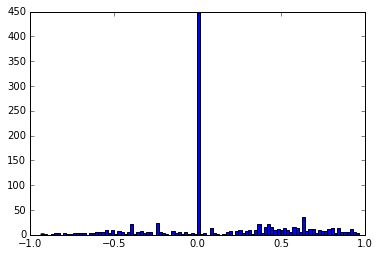

In [10]:
plt.hist(MyStreamer.data, 100)
plt.show()

In [11]:
print np.mean(MyStreamer.data)
print np.std(MyStreamer.data)

0.130394181818
0.402098771564
